In [1]:
#Max Season Files saved from NCS1.py are used to generate Figure S1
#Code to plot the multiple masked out plots for different algorithms for three years
#Previously Figure 1, now Figure S1
#Has the mean AR freq for each algorithm applied as an opaqcity factor to highlight higher frequency regions
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
import dask.array as da
import dask
import matplotlib as mpl
print("Done")
import xarray as xr
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.colors import ListedColormap
from matplotlib.colors import ListedColormap
import string

Done


In [2]:
#Using the peak season values for respective years 
CB1985=xr.open_dataset('/N/u/dkamnani/BigRed200/Paper plots/cascade_bard1985.nc').drop_vars('year')
CB2005=xr.open_dataset('/N/u/dkamnani/BigRed200/Paper plots/cascade_bard2005.nc').drop_vars('year')
CB2015=xr.open_dataset('/N/u/dkamnani/BigRed200/Paper plots/cascade_bard2015.nc').drop_vars('year')
IVT1985=xr.open_dataset('/N/u/dkamnani/BigRed200/Paper plots/Mundhenk1985.nc').drop_vars('year')
IVT2005=xr.open_dataset('/N/u/dkamnani/BigRed200/Paper plots/Mundhenk2005.nc').drop_vars('year')
IVT2015=xr.open_dataset('/N/u/dkamnani/BigRed200/Paper plots/Mundhenk2015.nc').drop_vars('year')
CB=np.vstack([CB1985.to_array(),CB2005.to_array(),CB2015.to_array(),IVT1985.to_array(),IVT2005.to_array(),IVT2015.to_array()])
names=["(a) TECA-BARD v1.0.1 : 1985", "(b) TECA-BARD v1.0.1 : 2005","(c) TECA-BARD v1.0.1 : 2015","(d) Mundhenk : 1985", "(e) Mundhenk : 2005","(f) Mundhenk : 2015"]


In [3]:
#Mean AR Freq

# Load mean AR frequency datasets for each algorithm
file_names = [ 'Mean_AR_MD.nc',  'Mean_AR_CB.nc']

mean_ar_frequencies = []

for file in file_names:
    dataset = xr.open_dataset(file)
    ar_freq=dataset.ar_binary_tag.values
    mean_ar_frequencies.append(ar_freq / ar_freq.max() )  # Normalizing

# Convert list to a NumPy array (shape: 6, height, width)
mean_ar_frequencies = np.stack(mean_ar_frequencies, axis=0)

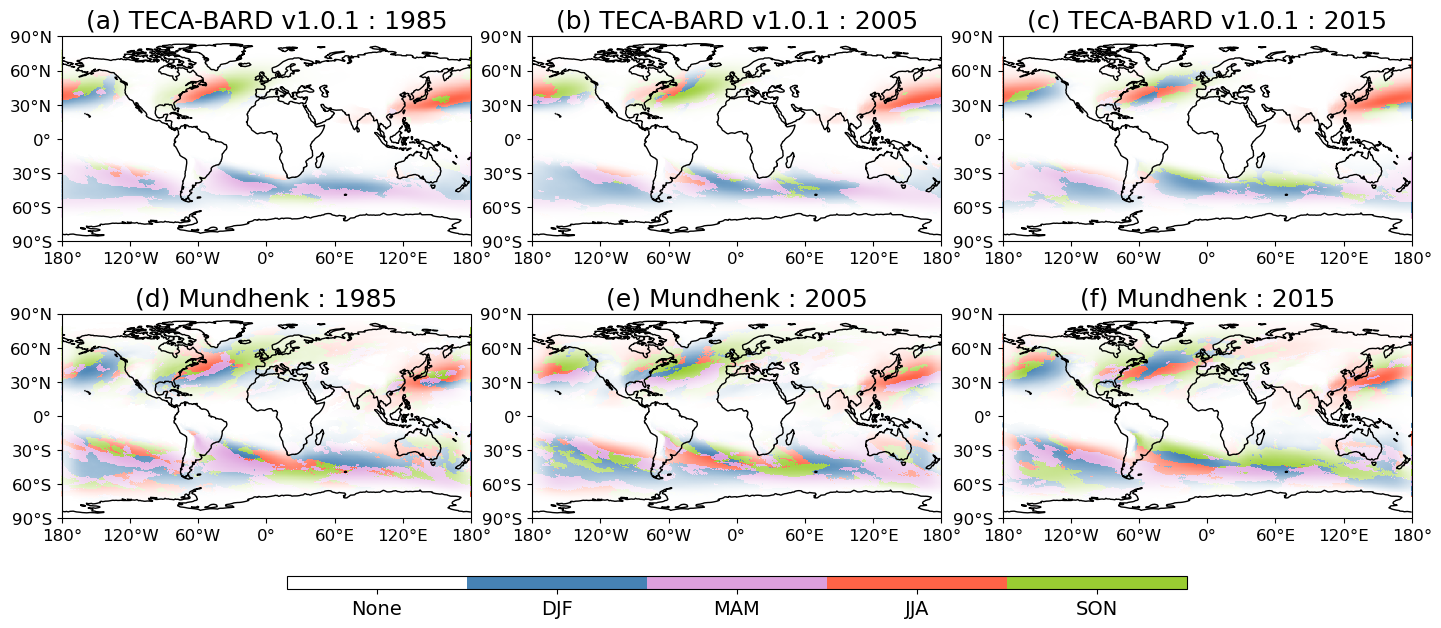

In [29]:
from matplotlib.colors import BoundaryNorm, ListedColormap
lat=CB1985.lat
lon=CB1985.lon
fig, axs = plt.subplots(nrows=2,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(15,6.5))
bounds = np.arange(0, 5, 1)  # For example, from 0 to 1 with 0.1 intervals
n_colors = len(bounds) - 1
# Define the five color-blind friendly colors with RGBA values (R, G, B, A)
colors=['white','steelblue', 'plum', 'tomato','yellowgreen']
# Create a ListedColormap from these colors
cmap = ListedColormap(colors)

lab=["(a)","(b)","(c)","(d)","(e)","(f)"]             
# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()
for i in range(0,6):

        data=CB[i]+0.5
        
        #cm = (mpl.colors.ListedColormap(['white','powderblue', 'khaki', 'olive','coral']))
        #norm = mpl.colors.BoundaryNorm([0,1,2,3,4,5], cm.N) 
        #cm=plt.cm.get_cmap('cubehelix', 4)
        # Contour plot
        cs=axs[i].pcolormesh(lon,lat,data,
                          transform = ccrs.PlateCarree(),
                          cmap=cmap,
                          )
        if (i==0 or i==1 or i==2):
                # Apply 2D alpha transparency
                cs.set_alpha(mean_ar_frequencies[1])
        elif (i==3 or i==4 or i==5):
                cs.set_alpha(mean_ar_frequencies[0])
        
        # Title each subplot with the name of the model
        axs[i].set_title(names[i],fontsize=14)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        axs[i].tick_params(axis='x', labelsize=12)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        axs[i].tick_params(axis='y', labelsize=12)
        #Annotate plot
        axs[i].set_title(names[i],fontsize=18)

fig.subplots_adjust(bottom=0.10, top=1.0, left=0.05, right=0.95,
                    wspace=0.15, hspace=-0.1)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.07, 0.6, 0.02])

# Draw the colorbar
bounds=[0,1,2,3,4,5]
norms = BoundaryNorm(bounds, len(bounds) - 1)
cbar=plt.colorbar(cs,cax=cbar_ax, orientation="horizontal",pad=0.05,shrink=0.9,boundaries = bounds,norm=norms)
cbar.set_ticks([0.5,1.5,2.5,3.5,4.5])
cbar.set_ticklabels(["None","DJF","MAM","JJA","SON"],fontsize=14)
plt.savefig("Figure2.png", dpi=600, bbox_inches='tight', pad_inches=0.1)
plt.show()
#plt.savefig("IVT_years")
